# Clustering Assignment

Q 1. What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

->   K-Means is a centroid-based clustering technique that groups data into K clusters by minimizing the distance between data points and cluster centers. It works best when data is spherical and the number of clusters is already known. K-Means is fast and efficient, especially for large datasets.

Hierarchical Clustering, on the other hand, builds a cluster tree by repeatedly merging or splitting clusters. It does not require the number of clusters in advance and gives a visual dendrogram that helps understand cluster relationships. It is well-suited for smaller datasets where interpretability is important.

A use case for K-Means is customer segmentation based on shopping patterns. A use case for Hierarchical Clustering is grouping genes in biological data where understanding similarity levels matters.

Q 2. Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

->  The Silhouette Score measures how well each data point fits within its assigned cluster compared to other clusters. A high silhouette value means a point is similar to its own cluster and far from others, which indicates a good clustering structure.

The score ranges from -1 to 1, where values close to 1 show clear and well-separated clusters. Values near 0 show overlapping clusters, and negative scores indicate incorrect clustering.

This metric is important because it provides an objective way to evaluate the quality of clustering without needing the true labels.

Q 3. What are the core parameters of DBSCAN, and how do they influence the clustering process?

->  DBSCAN uses two main parameters: eps (epsilon) and min_samples.

eps defines the maximum distance between two points to be considered neighbors. If eps is too small, the algorithm will classify most points as noise; if too large, it will merge too many points into one cluster.

min_samples defines how many points are needed to form a dense region. A higher value makes DBSCAN stricter, detecting only strong clusters, while a smaller value allows more flexible cluster formation.

These parameters directly control how DBSCAN identifies core points, border points, and noise, making DBSCAN powerful for noise-heavy datasets.

Q 4. Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

->  Clustering algorithms rely heavily on distance calculations, especially Euclidean distance. When features have different scales—for example, one feature in meters and another in kilograms—the larger-scaled feature dominates the distance measurement.

Scaling (StandardScaler or MinMaxScaler) ensures all features contribute equally to the distance calculation.

Without scaling, clusters become biased, resulting in poor clustering quality. Therefore, scaling is essential for fair, accurate, and meaningful clusters.

Q 5. What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

->  The Elbow Method is used to determine the best number of clusters (K) for K-Means. It works by plotting the within-cluster sum of squared distances (WCSS) against different values of K.

As K increases, WCSS decreases because clusters become more compact. But after a certain point, the improvement becomes small and forms an “elbow shape” on the graph.

The position of this elbow indicates the optimal number of clusters, where the model achieves a balance between simplicity and accuracy.

In [5]:
 # Dataset: 
# Use make_blobs, make_moons, and sklearn.datasets.load_wine() as specified.

Q 6. Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

->  Python code

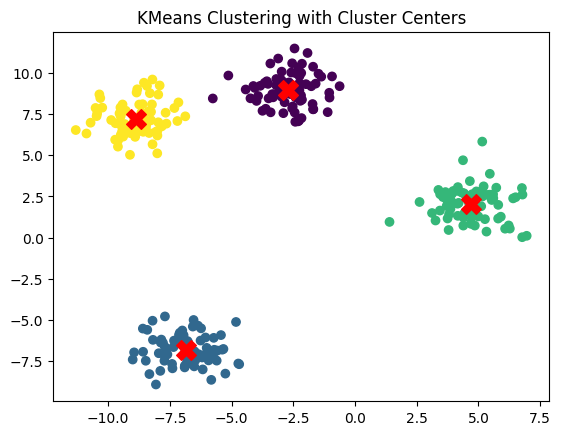

In [8]:
# Python Code
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            c='red', s=200, marker='X')
plt.title("KMeans Clustering with Cluster Centers")
plt.show()

Q 7. Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

->  Python Code

In [9]:
# Python Code
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load data
data = load_wine()
X = data.data

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN
db = DBSCAN(eps=1.5, min_samples=5)
labels = db.fit_predict(X_scaled)

# Count clusters excluding noise (-1)
clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found:", clusters)

Number of clusters found: 0


Q 8.  Generate moon-shaped synthetic data using 
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in 
the plot.

->  Python Code

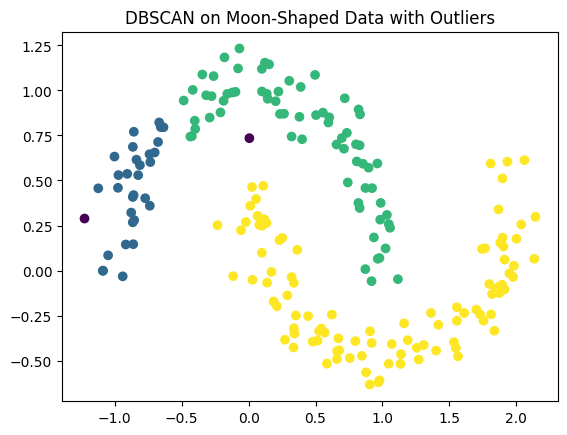

In [10]:
# Python Code
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# DBSCAN
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN on Moon-Shaped Data with Outliers")
plt.show()

Q 9. Load the Wine dataset, reduce it to 2D using PCA, then apply 
Agglomerative Clustering and visualize the result in 2D with a scatter plot.

->  Python Code

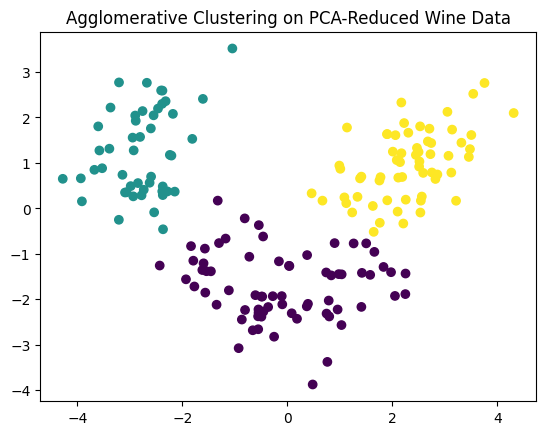

In [11]:
# Python Code
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load data
data = load_wine()
X = data.data

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering on PCA-Reduced Wine Data")
plt.show()

Q 10. You are working as a data analyst at an e-commerce company. The 
marketing team wants to segment customers based on their purchasing behavior to run 
targeted promotions. The dataset contains customer demographics and their product 
purchase history across categories.

Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)? 

● How would you determine the number of clusters? 

● How would the marketing team benefit from your clustering analysis?

->   For customer segmentation, clustering is a powerful way to understand buying patterns and identify groups of similar customers. I would begin by applying algorithms like K-Means or DBSCAN depending on the structure of the data. K-Means works well for large, well-separated groups, while DBSCAN is useful when customer behavior has noise or irregular patterns.

Before applying clustering, I would preprocess the data by filling missing values using median or mean imputation, converting categorical variables using one-hot encoding, and applying StandardScaler so that all features contribute equally. This step ensures that distance-based clustering gives meaningful results.

To determine the right number of clusters, I would use techniques like the Elbow Method, Silhouette Score, or dendrograms. These methods help identify the natural structure in the data.

The marketing team can use the clustering results to create targeted promotions. For example, a cluster of high spenders can receive premium offers, while budget-focused customers can get discount-based recommendations. This leads to personalized marketing, higher customer satisfaction, and better revenue.

Overall, this workflow provides a strong and practical solution for understanding customer behavior and improving marketing strategy using data science. 